## QB Data Analysis

In [51]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 500
qb_file = "qb_games_more_10.csv"

In [52]:
qb_data = pd.read_csv(qb_file)
qb_data.head()

,Unnamed: 0,name,id,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3
0,31,A.J. Feeley,FeelA.00,2001,2002-01-06,16,24.235,PHI,@,TAM,W 17-13,NaN,10.0,14.0,71.43,143.0,2.0,1.0,114.0,0.0,0.0,10.21,9.86,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,A.J. Feeley,FeelA.00,2002,2002-12-01,12,25.199,PHI,NaN,STL,W 10-3,*,14.0,30.0,46.67,181.0,0.0,0.0,66.1,3.0,24.0,6.03,6.03,2.0,3.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,A.J. Feeley,FeelA.00,2002,2002-12-08,13,25.206,PHI,@,SEA,W 27-20,*,21.0,35.0,60.00,190.0,2.0,1.0,81.8,0.0,0.0,5.43,5.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,A.J. Feeley,FeelA.00,2002,2002-12-15,14,25.213,PHI,NaN,WAS,W 34-21,*,16.0,28.0,57.14,220.0,2.0,1.0,91.4,2.0,10.0,7.86,7.68,2.0,5.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,A.J. Feeley,FeelA.00,2002,2002-12-21,15,25.219,PHI,@,DAL,W 27-3,*,19.0,33.0,57.58,253.0,1.0,2.0,66.9,1.0,8.0,7.67,5.55,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning

In [53]:
# 26951 games included, with 34 columns
qb_data.shape

(26951, 34)

In [54]:
# see which columns have na values
qb_data.isna().any()

Unnamed: 0    False
name          False
id            False
Year          False
Date          False
G.            False
Age           False
Tm            False
X              True
Opp           False
Result        False
GS             True
Cmp            True
Att           False
Cmp.           True
Yds            True
TD             True
Int            True
Rate           True
Sk             True
Yds.1          True
Y.A            True
AY.A           True
Att.1          True
Yds.2          True
Y.A.1          True
TD.1           True
TD.2           True
Pts            True
Fmb            True
FF             True
FR             True
Yds.3          True
TD.3           True
dtype: bool

In [55]:
# replace most NA values with 0
columns_to_set_na_to_0 = ['Cmp','Cmp.','Yds','TD','Int','Rate','Sk','Yds.1','Y.A','AY.A','Att.1','Yds.2','Y.A.1','TD.1','TD.2','Pts','Fmb','FF','FR','Yds.3','TD.3']
qb_data[columns_to_set_na_to_0] = qb_data[columns_to_set_na_to_0].fillna(0)
# make game started a boolean
qb_data['GS'] = qb_data['GS'] == "*"
# get rid of this random column
qb_data = qb_data.drop('Unnamed: 0', axis=1)

In [56]:
# extract a win from the result column with a 1, or a 0 for a loss
qb_data['team_win'] = [1 if "W" in x else 0 for x in qb_data['Result']]
# get a list of games the team won that that QB started
qb_data['start_win'] = [1 if ("W" in qb_data.loc[i,'Result'] and qb_data.loc[i,'GS'] == True) else 0 for i in range(qb_data.shape[0])]

In [57]:
# iterating through the list of QBs to figure out which "game number" of their career each game represents
games_list = []
games_started = []
last_qb = None
for index, row in qb_data.iterrows():
    current_qb = row.id
    if current_qb != last_qb:
        count = 1
        if row['GS'] == True:
            gs_count = 1
        else:
            gs_count = 0
    else:
        count += 1
        if row['GS'] == True:
            gs_count +=1
    games_list.append(count)
    games_started.append(gs_count)
    last_qb = current_qb
qb_data['game_count'] = games_list
qb_data['start_count'] = games_started

In [71]:
# get the total number of games a player played and started in their career
qb_total_games = qb_data.groupby(['name','id'])['game_count', 'start_count'].max()
qb_total_games['win_count'] = qb_data.groupby(['name','id'])['team_win'].sum()
#qb_games_started = qb_data.groupby(['name','id'])['start_count'].max()
qb_total_games.head() 

,,game_count,start_count,win_count
name,id,,,
A.J. Feeley,FeelA.00,23,18,11
A.J. McCarron,McCaA.00,5,4,2
Aaron Brooks,BrooAa00,92,91,39
Aaron Rodgers,RodgAa00,167,164,106
Adrian Burk,BurkAd00,51,39,18


In [72]:
# get sum totals for each QB on the following columns
sum_columns =['Cmp', 'Att','Yds','TD','Int','Sk','Fmb','team_win','start_win']
qb_totals = qb_data.groupby(['name', 'id'])[sum_columns].sum()

# join that table with the games started and total games tables
qb_totals = qb_totals.join(qb_total_games)
qb_totals.head()

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,win_count
name,id,,,,,,,,,,,,
A.J. Feeley,FeelA.00,416.0,747.0,4553.0,27.0,31.0,42.0,3.0,11,8,23,18,11
A.J. McCarron,McCaA.00,99.0,156.0,1044.0,7.0,3.0,15.0,4.0,2,2,5,4,2
Aaron Brooks,BrooAa00,1719.0,3040.0,20822.0,129.0,95.0,239.0,0.0,39,39,92,91,39
Aaron Rodgers,RodgAa00,3756.0,5805.0,45426.0,364.0,89.0,424.0,70.0,106,106,167,164,106
Adrian Burk,BurkAd00,473.0,1008.0,6647.0,59.0,79.0,0.0,0.0,18,14,51,39,18


In [73]:
# add some more columns based on career totals
qb_totals['Cmp.'] = qb_totals['Cmp'] / qb_totals['Att']
qb_totals['Y.A'] = qb_totals['Yds'] / qb_totals['Att']
qb_totals['TD_pct'] = qb_totals['TD'] / qb_totals['Att']
qb_totals['Int_pct'] = qb_totals['Int'] / qb_totals['Att']
# below is the winning percentage for the team in the games that they started
qb_totals['gs_wp'] = (qb_totals['start_win'] / qb_totals['start_count']).fillna(0)
qb_totals['sack_pg'] = (qb_totals['Sk'] / qb_totals['start_count']).fillna(0)

In [74]:
qb_totals['Year'] =qb_data.groupby(['name', 'id'])['Year'].max()
train = qb_totals[((qb_totals.start_count >= 10) & (qb_totals.Year < 2018))]
train = train.reset_index()
qb_train_names = train.name
qb_train_names = qb_train_names.tolist()

# Creating Training Set

Want to study how stats in first 8 games can predict win total for an entire career wins
first gathered all players who played at least 10 career games and who's career is over
Gathered game stats for first 8 games for that player included win total in that dataframe 
since that is our y. So win_count below is total wins for players career

In [75]:
train = qb_data[qb_data.game_count <= 8]
train = train[train.name.str.contains("|".join(qb_train_names))]
train

,name,id,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3,team_win,start_win,game_count,start_count
0,A.J. Feeley,FeelA.00,2001,2002-01-06,16,24.235,PHI,@,TAM,W 17-13,False,10.0,14.0,71.43,143.0,2.0,1.0,114.0,0.0,0.0,10.21,9.86,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
1,A.J. Feeley,FeelA.00,2002,2002-12-01,12,25.199,PHI,NaN,STL,W 10-3,True,14.0,30.0,46.67,181.0,0.0,0.0,66.1,3.0,24.0,6.03,6.03,2.0,3.0,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,1
2,A.J. Feeley,FeelA.00,2002,2002-12-08,13,25.206,PHI,@,SEA,W 27-20,True,21.0,35.0,60.00,190.0,2.0,1.0,81.8,0.0,0.0,5.43,5.29,3.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3,2
3,A.J. Feeley,FeelA.00,2002,2002-12-15,14,25.213,PHI,NaN,WAS,W 34-21,True,16.0,28.0,57.14,220.0,2.0,1.0,91.4,2.0,10.0,7.86,7.68,2.0,5.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,3
4,A.J. Feeley,FeelA.00,2002,2002-12-21,15,25.219,PHI,@,DAL,W 27-3,True,19.0,33.0,57.58,253.0,1.0,2.0,66.9,1.0,8.0,7.67,5.55,2.0,2.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,5,4
5,A.J. Feeley,FeelA.00,2002,2002-12-28,16,25.226,PHI,@,NYG,L 7-10,True,13.0,25.0,52.00,150.0,0.0,1.0,53.7,1.0,6.0,6.00,4.20,1.0,-1.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,6,5
6,A.J. Feeley,FeelA.00,2004,2004-09-11,1,27.118,MIA,NaN,TEN,L 7-17,False,21.0,31.0,67.74,168.0,1.0,1.0,78.4,2.0,11.0,5.42,4.61,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,7,5
7,A.J. Feeley,FeelA.00,2004,2004-09-19,2,27.126,MIA,@,CIN,L 13-16,True,21.0,39.0,53.85,218.0,1.0,2.0,57.4,2.0,17.0,5.59,3.79,1.0,3.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,8,6
28,Aaron Brooks,BrooAa00,2000,2000-11-19,11,24.240,NOR,NaN,OAK,L 22-31,False,14.0,22.0,63.64,187.0,2.0,1.0,101.9,3.0,26.0,8.50,8.27,7.0,5.0,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
29,Aaron Brooks,BrooAa00,2000,2000-11-26,12,24.247,NOR,@,STL,W 31-24,True,17.0,29.0,58.62,190.0,1.0,2.0,61.0,1.0,5.0,6.55,4.14,7.0,34.0,4.86,2.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0,1,1,2,1


In [77]:
qb_total_first_8_games = train.groupby(['name','id']).agg('count')

sum_columns =['Cmp', 'Att','Yds','TD','Int','Sk','Fmb','team_win','start_win']
#Per game stats
qb_totals = (train.groupby(['name', 'id'])[sum_columns].sum())/8
qb_totals['Cmp.'] = qb_totals['Cmp'] / qb_totals['Att']
qb_totals['Y.A'] = qb_totals['Yds'] / qb_totals['Att']
qb_totals['TD_pct'] = qb_totals['TD'] / qb_totals['Att']
qb_totals['Int_pct'] = qb_totals['Int'] / qb_totals['Att']
# join that table with the games started and total games tables
qb_totals_first_8 = qb_totals.join(qb_total_games['win_count'])
qb_totals_first_8

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,Cmp.,Y.A,TD_pct,Int_pct,win_count
name,id,,,,,,,,,,,,,,
A.J. Feeley,FeelA.00,16.875,29.375,190.375,1.125,1.125,1.375,0.000,0.625,0.500,0.574468,6.480851,0.038298,0.038298,11
Aaron Brooks,BrooAa00,19.875,34.625,251.750,1.625,0.875,2.625,0.000,0.500,0.500,0.574007,7.270758,0.046931,0.025271,39
Adrian Burk,BurkAd00,6.375,16.750,114.250,1.000,1.750,0.000,0.000,0.125,0.125,0.380597,6.820896,0.059701,0.104478,18
Akili Smith,SmitAk00,14.000,29.375,153.375,0.375,1.250,3.875,0.000,0.125,0.125,0.476596,5.221277,0.012766,0.042553,2
Al Dorow,DoroAl00,8.500,17.250,117.500,0.875,1.750,0.000,0.000,0.500,0.500,0.492754,6.811594,0.050725,0.101449,19
Archie Manning,MannAr00,11.750,23.875,152.500,0.875,0.875,0.000,0.000,0.250,0.250,0.492147,6.387435,0.036649,0.036649,32
Austin Davis,DaviAu00,20.375,31.750,223.125,1.375,0.875,2.875,0.500,0.375,0.375,0.641732,7.027559,0.043307,0.027559,3
Babe Parilli,PariBa00,7.375,17.000,140.750,1.250,1.875,0.000,0.000,0.625,0.250,0.433824,8.279412,0.073529,0.110294,60
Bart Starr+,StarBa00,10.500,21.125,140.375,0.625,1.000,0.000,0.000,0.250,0.250,0.497041,6.644970,0.029586,0.047337,95


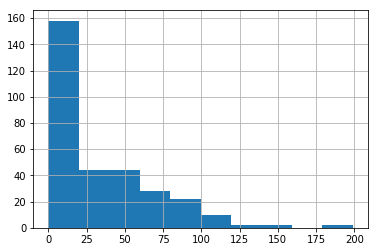

In [78]:
%matplotlib inline
qb_totals_first_8.win_count.hist()

# First Linear Model

In [92]:
from sklearn.linear_model import LinearRegression
X = qb_totals_first_8.iloc[:,0:13]
y = qb_totals_first_8['win_count']
reg = LinearRegression().fit(X, y)
#Check R^2 of first model
reg.score(X, y)
#eh not great can we improve it???

0.10802264113667016

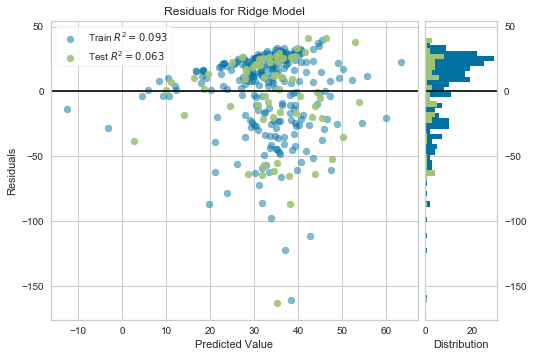

In [93]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()  

# Exploratory Data Analysis

In [18]:
qb_10_starts.describe()

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,1229.225434,2146.694480,14966.765896,92.858382,80.309249,108.682081,7.445087,36.263006,34.771676,74.141618,68.601156,0.552161,6.700975,0.039437,0.041330,0.440670
std,1209.961214,1980.814497,14531.835341,98.180285,68.332603,125.893641,16.840381,37.223768,36.952965,61.477981,61.037574,0.082087,0.679096,0.010767,0.015369,0.151178
min,0.000000,239.000000,838.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,3.092251,0.011338,0.000000,0.000000
25%,340.000000,647.250000,4048.250000,24.000000,27.000000,2.250000,0.000000,9.000000,8.000000,25.000000,20.000000,0.518705,6.359342,0.032562,0.030452,0.357601
50%,769.000000,1420.500000,9106.500000,53.000000,58.000000,63.000000,0.000000,21.000000,19.000000,52.000000,45.000000,0.555775,6.778566,0.039503,0.038126,0.461538
75%,1830.000000,3191.500000,22582.250000,138.000000,110.750000,171.250000,7.000000,55.750000,53.000000,112.500000,102.750000,0.591620,7.101500,0.045196,0.051577,0.538462
max,6781.000000,10938.000000,79104.000000,578.000000,361.000000,556.000000,102.000000,230.000000,230.000000,321.000000,319.000000,1.353786,9.048295,0.082386,0.118667,0.900000


In [24]:
# comparing this to his football reference page i see this data includes playoff games, might be unfair to include that
qb_10_starts.loc['Peyton Manning']

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp
id,,,,,,,,,,,,,,,,
MannPe00,6760.0,10387.0,79104.0,578.0,276.0,340.0,24.0,198,198,289,289,0.650814,7.615673,0.055646,0.026572,0.685121


In [38]:
# poor bobby hoying
qb_10_starts.sort_values('sack_pg', ascending=False)

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
name,id,,,,,,,,,,,,,,,,,
Bobby Hoying,HoyiBo00,250.0,465.00,2641.0,11.0,17.0,65.0,0.0,3,3,16,13,0.537634,5.679570,0.023656,0.036559,0.230769,5.000000
Turk Schonert,SchoTu00,276.0,444.00,3306.0,11.0,19.0,54.0,0.0,9,6,20,11,0.621622,7.445946,0.024775,0.042793,0.545455,4.909091
Rob Johnson,JohnRo00,480.0,784.00,5648.0,29.0,18.0,132.0,0.0,11,11,29,27,0.612245,7.204082,0.036990,0.022959,0.407407,4.888889
Hugh Millen,MillHu00,537.0,890.00,6165.0,22.0,33.0,117.0,0.0,8,7,32,25,0.603371,6.926966,0.024719,0.037079,0.280000,4.680000
Jeff Rutledge,RutlJe00,244.0,468.00,3222.0,13.0,26.0,42.0,0.0,6,2,16,10,0.521368,6.884615,0.027778,0.055556,0.200000,4.200000
Billy Volek,VoleBi00,318.0,523.00,3558.0,26.0,12.0,42.0,0.0,5,3,15,10,0.608031,6.803059,0.049713,0.022945,0.300000,4.200000
Chad Hutchinson,HutcCh00,219.0,411.00,2458.0,11.0,11.0,57.0,0.0,3,3,14,14,0.532847,5.980535,0.026764,0.026764,0.214286,4.071429
Akili Smith,SmitAk00,206.0,441.00,2122.0,5.0,13.0,55.0,0.0,2,2,16,14,0.467120,4.811791,0.011338,0.029478,0.142857,3.928571
Austin Davis,DaviAu00,229.0,368.00,2471.0,12.0,12.0,39.0,7.0,3,3,11,10,0.622283,6.714674,0.032609,0.032609,0.300000,3.900000
